<a href="https://colab.research.google.com/github/alinysunderhus/Roof_Imoveis_Deliverable1_DNCGrup/blob/main/Roof_Imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identificação da aluna
Aluna: Aliny Pautz Sunderhus

RID: 34482

#1 - Entendimento do problema de negócio

Este projeto se propõe a realizar uma análise exploratória de um conjunto de dados referente a vendas de imóveis no Condado de King. 

\
Sendo o condado mais populoso dos 39 existentes no estado de Washington (EUA), o Condado de King tem na imigração a causa de mais da metade do crescimento populacional experimentado nas últimas décadas. Diferentemente de outros condados em que a maioria da população está concentrada na capital, a maior parte dos habitantes do Condado de King mora em cidades vizinhas e outras áreas urbanas. Menos de um terço reside na capital Seattle, apesar desta ser a cidade mais populosa de King. Maiores informações acerca da região podem ser encontradas na [página oficial do Condado de King](https://kingcounty.gov/depts/executive/performance-strategy-budget/regional-planning/Demographics.aspx ). 

\
Para a resolução deste projeto, considera-se a empresa fictícia **Roof Imóveis**. Esta empresa do ramo imobiliário deseja expandir sua área de atuação e investir internacionalmente.

\
O **principal objetivo** desta consultoria é selecionar 5 imóveis do Condado de King em que a Roof Imóveis deveria investir e 5 dos quais o investimento não é recomendado.

\
Para alcançar essa meta, pretende-se criar métricas para a classificação dos imóveis cujos dados estão disponíveis.

\
O Dataset a ser analisado contém 21613 registros de vendas de imóveis, realizadas entre maio de 2014 e maio de 2015 neste condado, sendo consideradas 21 características.



# 2 - Entendimento dos dados

## 2.1 - Importação de bibliotecas

In [59]:
# Instalando biblioteca uszipcode
!pip install uszipcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from uszipcode import SearchEngine, SimpleZipcode

## 2.2 - Carregamento dos dados

In [61]:
# Carregando os dados

url = 'https://raw.githubusercontent.com/alinysunderhus/Roof_Imoveis_Deliverable1_DNCGrup/main/kc_house_data.csv'
df = pd.read_csv(url)

## 2.3 - Análise exploratória inicial

In [62]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [63]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [64]:
# Verificando se há ocorrência valores nulos e o tipo de dado de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [65]:
# Os dados de quantidade de banheiros são do tipo float. Entendendo quais os valores presentes nessa coluna:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [66]:
# Verificando se há ocorrência de linhas duplicadas
df.duplicated().sum()

0

In [67]:
# Verificando se há identificadores duplicados
df['id'].duplicated().sum()

177

In [68]:
# Verificando medidas estatíticas 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


As medidas estatíticas mostraram que os atributos `waterfront`, `view` e `yr_renovated` devem possuir grande quantidade de valores iguais a zero, pois os quantis até o  quantil-75 possuem esse valor.

Além disso, muitos valores do atributo `sqft_basement` devem ser zero, pois esse é o valor até a mediana (quantil-50). 

In [69]:
# Verificando quais os valores únicos de beira-mar ('waterfront')
print(f'Valores únicos de vista para o mar: {df.waterfront.unique()}')

# Verificando a proporção de registros que são a baira-mar ou não
beiraMar = df.query('waterfront == 1').count()['waterfront']
nao_beiraMar = df.query('waterfront == 0').count()['waterfront']
print(f'Registros beira-mar: {(beiraMar/(beiraMar + nao_beiraMar))*100:.2f}% \nRegistros que não são a beira-mar: {(nao_beiraMar/(beiraMar + nao_beiraMar))*100:.2f}%')

Valores únicos de vista para o mar: [0 1]
Registros beira-mar: 0.75% 
Registros que não são a beira-mar: 99.25%


In [70]:
# Verificando quais os valores únicos de vista ('view')
print(f'Valores únicos de vista: {sorted(df.view.unique())}')

# Verificando a proporção de registros com diferentes tipos de vista
print('\nPorcentagem de cada valor de vista:')
df.view.value_counts(normalize=True)

Valores únicos de vista: [0, 1, 2, 3, 4]

Porcentagem de cada valor de vista:


0    0.901726
2    0.044557
3    0.023597
1    0.015361
4    0.014760
Name: view, dtype: float64

In [71]:
# Verificando a proporção de registros que nunca foram reformados (yr_renovated = 0)
nao_reforma = df.query('yr_renovated == 0').count()['yr_renovated']
reformados = df.query('yr_renovated != 0').count()['yr_renovated']

print(f'Porcentagem de registros que nunca foram reformados: {nao_reforma/(nao_reforma+reformados)*100:.2f}%')

Porcentagem de registros que nunca foram reformados: 95.77%


In [72]:
# Verificando a proporção de registros que não possuem porão (sqft_basement = 0)
nao_porao = df.query('sqft_basement == 0').count()['sqft_basement']
porao = df.query('sqft_basement != 0').count()['sqft_basement']

print(f'Porcentagem de registros que não possuem porão: {nao_porao/(nao_porao+porao)*100:.2f}%')

Porcentagem de registros que não possuem porão: 60.73%


A partir dessa análise inicial é possível concluir que:
- O conjunto de dados não possui valores nulos;
- os dados da coluna `date` deveriam ser do tipo *datetime*;
- os dados da coluna `bathrooms`deveriam ser do tipo inteiro;
- não há linhas duplicadas;
- há 177 registros de identificadores (`id`) duplicados. Isso indica que um mesmo imóvel foi vendido mais de uma vez. Através dessas informações, podemos averiguar se houve lucro ou prejuízo na segunda venda do imóvel;
- a quantidade máxima de quartos (`bedrooms`) é 33, um valor muito acima da média de todos os registros. Essa questão será verificada.
- a maioria (99,25%) dos registros não são do tipo beira-mar (`waterfront`);
- a maioria dos registros (90,17%) possuem zero como valor para a vista (`view`);
- cerca de 60% dos registros não possuem porão;
- para melhor entendimento do cliente, seria melhor que os nomes dos atributos fossem em português;
- ao pensarmos sobre localização dos imóveis, é interessante sabermos em quais cidade esses se encontram;
- ao avaliar o preço de um imóvel, é interresante utilizarmos uma métrica de preço/área.

## 2.4 - Tratamento inicial dos dados

In [73]:
# Convertendo os dados da coluna 'date' para o tipo datetime
df['date'] = pd.to_datetime(df['date'])

In [74]:
# Arredondando os valores da coluna 'bathroom'
df['bathrooms'] = df['bathrooms'].round(0)

# Convertendo os dados da coluna 'bathroom' para o tipo inteiro
df['bathrooms'] = df['bathrooms'].astype(int)

In [75]:
# Procurando quais os valores únicos contidos na coluna 'bedrooms'
sorted(df['bedrooms'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]

O número de quartos é incrementado de 1 a 1 até o 11. A partir daí, temos um número de 33 quartos, o que parece estranho.

Olhando esse registro de 33 quartos (célula abaixo) é possível notar que a área habitável (`sqft_living`) é menor que a média de todos os registros, logo seria logicamente inviável esse imóvel possui tantos quartos, podendo ser um erro de digitação. Esse registro será descartado.

In [76]:
df.query('bedrooms == 33')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,2,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [77]:
# Descartando registro em que o número de quartos é 33
df.drop(df.query('bedrooms == 33').index,inplace=True)

In [78]:
# Renomeando as colunas para português, que é a língua do cliente
df =  df.rename(columns = {'id':'id', 'date':'data', 'price':'preco', 
                           'bedrooms':'quartos','bathrooms':'banheiros', 
                           'sqft_living':'areaHab_pes2', 'sqft_lot':'areaLote_pes2', 
                           'floors':'andares','waterfront':'beiraMar', 'view':'vista', 
                           'condition':'condicao', 'grade':'qualiConstrucao', 
                           'sqft_above':'areaSuperficial_pes2', 'sqft_basement':'areaPorao_pes2', 
                           'yr_built':'anoConstrucao', 'yr_renovated':'anoReforma', 
                           'zipcode':'codigoPostal', 'lat':'latitude', 'long':'longitude', 
                           'sqft_living15':'areaHab15_pes2', 'sqft_lot15':'areaLote15_pes2'})

In [79]:
# Criando uma função que busca a cidade dos Estados Unidos referente ao zip code
search = SearchEngine()

def buscaCidade(x):
    cidade = search.by_zipcode(x).major_city
    return cidade if cidade else 'None'

# Criando uma coluna chamada 'cidade' que receberá o resultado da função
df['cidade'] = df['codigoPostal'].apply(buscaCidade)

Exception ignored in: <function SearchEngine.__del__ at 0x7effd2553dd0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.7/dist-packages/uszipcode/search.py", line 202, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 1809, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 1851, in _close_impl
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 923, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2416, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2639, in _do_close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2625, in _close_impl
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2617, in _connection_rollback_impl
  File "/usr/lo

In [80]:
# Criando uma nova coluna para a métrica preço/área
df['precoArea'] = df['preco'] / df['areaHab_pes2']

In [81]:
# Checando de forma geral como ficou o dataframe
df.head()

,id,data,preco,quartos,banheiros,areaHab_pes2,areaLote_pes2,andares,beiraMar,vista,...,areaPorao_pes2,anoConstrucao,anoReforma,codigoPostal,latitude,longitude,areaHab15_pes2,areaLote15_pes2,cidade,precoArea
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle,188.050847
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle,209.338521
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore,233.766234
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle,308.163265
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish,303.571429


# 3 - Análise exploratória dos preços

## 3.1 - Matriz de correlação

Após limpeza dos dados, começaremos a análise exploratória averiguando quais os atributos numéricos presentes no conjunto de dados estão mais correlacionados com o preço dos imóveis. Para isso, utilizaremos uma matriz de correlação.

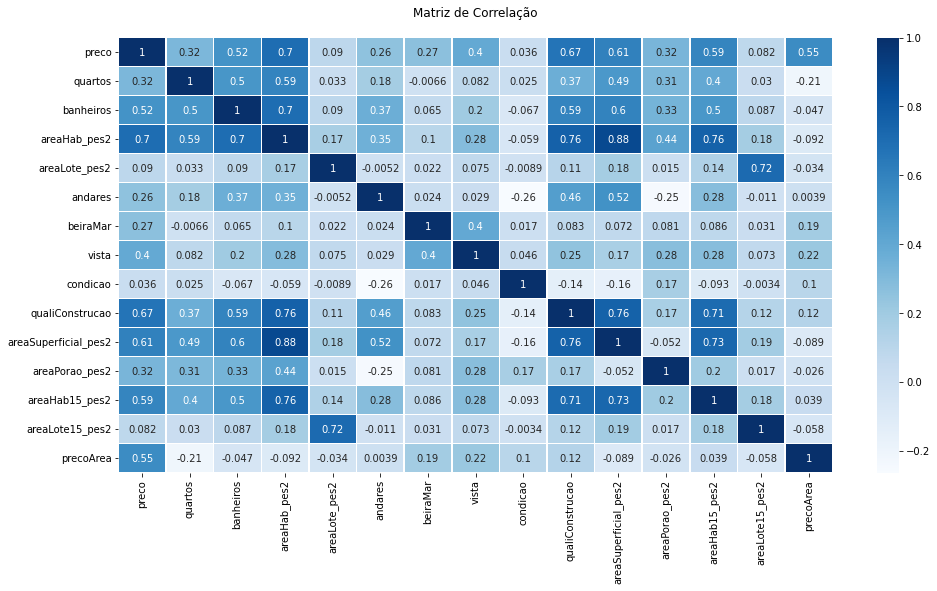

In [123]:
# Selecionando os atributos numéricos
numericos = df[['preco', 'quartos', 'banheiros', 'areaHab_pes2', 'areaLote_pes2', 'andares',
              'beiraMar', 'vista', 'condicao', 'qualiConstrucao', 'areaSuperficial_pes2',
               'areaPorao_pes2', 'areaHab15_pes2', 'areaLote15_pes2', 'precoArea']]

plt.figure(figsize = (16,8))
correlation = sns.heatmap(numericos.corr(), cmap='Blues', linewidths=.5, annot=True)
correlation.set(title = "Matriz de Correlação\n");

plt.savefig('matrix_correlacao.png', format='png')

As características que se mostraram mais correlacionadas com o preço do imóvel foram:
- Área habitável do imóvel (`areaHab_pes2`);
- qualidade dos materiais utilizados na construção (`qualiConstrucao`);
- área habitável média dos 15 imóveis mais próximos (`areaHab15_pes2`)
- área superficial do imóvel (`areaSuperficial_pes2`).

Esta última característica não será levada em consideração nas próximas análises por já ser muito relacionada com a área habitável.

## 3.2 - Análise dos imóveis revendidos



A partir dos identificadores (id) duplicados iremos verificar se houve lucro ou prejuízo com a venda mais recente desses imóveis.

In [126]:
# Criando um dataframe para guardar os registro de ids duplicados
df_id = df[df.duplicated(subset=['id'], keep=False)]  # keep = False mantem todos os duplicados

# Selecionando apenas algumas colunas desse dataframe
df_id = df_id[['id', 'data', 'preco', 'precoArea', 'cidade']]
df_id.head()

,id,data,preco,precoArea,cidade
93,6021501535,2014-07-25,430000.0,272.151899,Seattle
94,6021501535,2014-12-23,700000.0,443.037975,Seattle
313,4139480200,2014-06-18,1384000.0,322.610723,Bellevue
314,4139480200,2014-12-09,1400000.0,326.340326,Bellevue
324,7520000520,2014-09-05,232000.0,187.096774,Seattle


In [127]:
df_id.shape

(353, 5)

Observa-se acima que o novo dataframe df_id possui 353 registros. Isso indica que um ou mais imóveis foram vendidos mais de uma vez, pois, caso contrário, esse número de linhas seria um número par.

In [128]:
df_id['id'].value_counts()

795000620     3
6021501535    2
3935900232    2
1217000340    2
9238500040    2
             ..
2621600015    2
2206700215    2
2787460720    2
3883800011    2
7853420110    2
Name: id, Length: 176, dtype: int64

O imóvel cujo id é 795000620 foi vendido 3 vezes. Vamos olhar esses registros:

In [129]:
df_id.query('id == 795000620')

,id,data,preco,precoArea,cidade
17602,795000620,2014-09-24,115000.0,106.481481,Seattle
17603,795000620,2014-12-15,124000.0,114.814815,Seattle
17604,795000620,2015-03-11,157000.0,145.370370,Seattle


Para fins de calcular a diferença de preço entre vendas, vamos considerar apenas as duas últimas.

In [130]:
# Removendo primeiro registro de venda do imóvel 795000620
df_id.drop(df_id.query('id == 795000620 and preco == 115000.0').index,inplace=True)
df_id.shape

(352, 5)

In [131]:
# Criando um novo dataframe para armazenar a diferença de preço e preço/área entre as vendas
df_id2 = df_id[['id', 'preco', 'precoArea']].groupby('id').diff()
df_id2 = df_id2.rename(columns={'preco':'preco_dif', 'precoArea': 'precoArea_dif'})
df_id2.head()

,preco_dif,precoArea_dif
93,NaN,NaN
94,270000.0,170.886076
313,NaN,NaN
314,16000.0,3.729604
324,NaN,NaN


In [132]:
# Criando novo dataframe para agrupar os dados de id, preco_dif, precoArea_dif e cidade
df_revenda = df_id.join(df_id2, how='inner')
df_revenda.dropna(inplace=True)
df_revenda.drop(['data', 'preco', 'precoArea'], axis=1, inplace=True)
df_revenda.head()

,id,cidade,preco_dif,precoArea_dif
94,6021501535,Seattle,270000.0,170.886076
314,4139480200,Bellevue,16000.0,3.729604
325,7520000520,Seattle,8500.0,6.854839
346,3969300030,Seattle,74900.0,74.900000
372,2231500030,Seattle,215000.0,98.623853


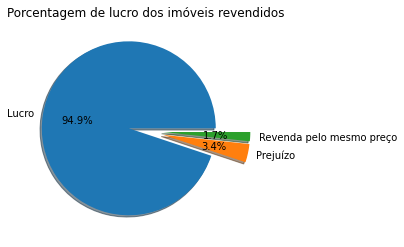

In [133]:
# Calculando a porcentagem de revenda que tiveram lucro, prejuízo ou cujo resultado foi zero.
lucro = df_revenda.query('preco_dif > 0').count()['id'] / df_revenda.shape[0] *100
prejuizo = df_revenda.query('preco_dif < 0').count()['id'] / df_revenda.shape[0] *100
no_dif = df_revenda.query('preco_dif == 0').count()['id'] / df_revenda.shape[0] *100

plt.figure()
plt.pie([lucro, prejuizo, no_dif], labels=['Lucro', 'Prejuízo', 'Revenda pelo mesmo preço'], autopct='%1.1f%%',shadow=True, explode=(0.2, 0.2, 0.2))
plt.title('Porcentagem de lucro dos imóveis revendidos');

Percebe-se que a maioria das revendas foi feita com lucro.
\
Apenas 3,4% das revendas apresentaram prejuízo e 1,7% delas não obteve nem lucro nem prejuízo.

## 3.3 - Relação preço x localização e qualidade x localização

In [134]:
# Criando um dataset que armazenará a média dos preços e a média da relação preço/área de cada cidade
df_precoLocal = df.groupby(['cidade']).mean().reset_index()[['cidade', 'preco', 'precoArea', 'qualiConstrucao']]
df_precoLocal.rename(columns={'preco': 'preco_MediaLocal', 'precoArea': 'precoArea_MediaLocal', 'qualiConstrucao':'qualiConst_MediaLocal'}, inplace=True)
df_precoLocal['qualiConst_MediaLocal'] = df_precoLocal['qualiConst_MediaLocal'].round(0)
df_precoLocal.head()

,cidade,preco_MediaLocal,precoArea_MediaLocal,qualiConst_MediaLocal
0,Auburn,291481.484649,153.044820,7.0
1,Bellevue,898187.639659,340.335312,8.0
2,Black Diamond,423665.990000,210.095356,7.0
3,Bothell,490351.466667,225.987235,8.0
4,Carnation,455617.112903,223.084512,7.0


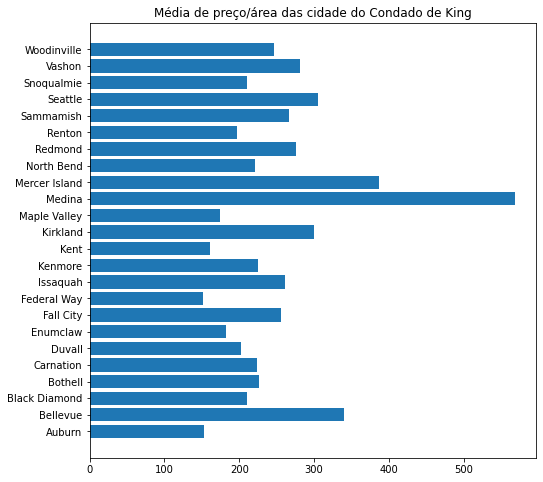

In [138]:
plt.figure(figsize=(8,8))

x = df_precoLocal['cidade']
y = df_precoLocal['precoArea_MediaLocal']
plt.barh(x, y)
plt.title('Média de preço/área das cidade do Condado de King');

plt.savefig('precoArea_MediaLocal.png', format='png')

Os imóveis da cidade de Medina são os que apresentam a área de imóvel mais cara do Condado de King.

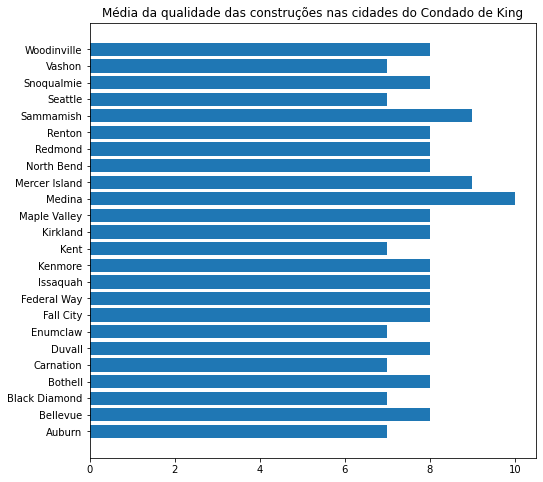

In [139]:
plt.figure(figsize=(8,8))

x = df_precoLocal['cidade']
y = df_precoLocal['qualiConst_MediaLocal']
plt.barh(x, y)
plt.title('Média da qualidade das construções nas cidades do Condado de King');
plt.savefig('qualiConst_MediaLocal.png', format='png')

Os imóveis da cidade de Medina também são os que apresentam a maior média de qualidade da construção no Condado de King.

## 3.4 - Classificação dos imóveis

A fim de classificar os imóveis, atribuiremos uma nota para cada um deles.

Relembrando os insights tirados da matriz de correlação, os atributos que possuem maior correlação com o preço dos imóveis são:
- Área habitável do imóvel (`areaHab_pes2`);
- qualidade dos materiais utilizados na construção (`qualiConstrucao`);
- área habitável dos 15 imóveis mais próximos(`areaHab15_pes2`).

\
Foram consideradas características desejadas nos imóveis para se realizar o investimento:
- preço/área < média de preço/área da cidade onde o imóvel está localizado. Desta forma, o preço/area do imóvel estará mais barato do que é cobrado em média naquela localidade.

- qualidade da construção > média da qualidade da construção na cidade onde imóvel está localizado. Desta forma, o imóvel terá uma qualidade superior a média da qualidade os imóveis naquela localidade.

- área habitável > área habitável dos 15 vizinhos mais próximos. Desta forma, o imóvel será maior que os imóveis vizinhos.

Cada uma dessas 3 relações será utilizada para calcular uma nota para os imóveis. 






Como cada atributo possui uma correlação diferente com o preço do imóvel, criaremos um peso para cada uma das três notas.

Para isso, usaremos o valor de correlação entre preço e os atributos área habitável, qualidade da construção e área habitável dos 15 imóveis mais próximos.

In [93]:
# Criando dataframe final com os atributos relevantes

df_final= df[['id','areaHab_pes2', 'preco', 'precoArea', 'qualiConstrucao', 'areaHab15_pes2', 'cidade']]
df_final = df_final.merge(df_precoLocal)
df_final.drop_duplicates(subset='id', keep='last', inplace=True) # remover ids duplicados
df_final.head()

,id,areaHab_pes2,preco,precoArea,qualiConstrucao,areaHab15_pes2,cidade,preco_MediaLocal,precoArea_MediaLocal,qualiConst_MediaLocal
0,7129300520,1180,221900.0,188.050847,7,1340,Seattle,534952.068627,304.7649,7.0
1,6414100192,2570,538000.0,209.338521,7,1690,Seattle,534952.068627,304.7649,7.0
2,2487200875,1960,604000.0,308.163265,7,1360,Seattle,534952.068627,304.7649,7.0
3,2008000270,1060,291850.0,275.330189,7,1650,Seattle,534952.068627,304.7649,7.0
4,2414600126,1780,229500.0,128.932584,7,1780,Seattle,534952.068627,304.7649,7.0


In [140]:
# Calculando as correlações preço x (área habitável, qualidade construção, área habitável dos 15 vizinhos)
correlacao_area = df_final['preco'].corr(df_final['areaHab_pes2'])
correlacao_quali = df_final['preco'].corr(df_final['qualiConstrucao'])
correlacao_area15 = df_final['preco'].corr(df_final['areaHab15_pes2'])
soma_correlacoes = correlacao_area + correlacao_quali + correlacao_area15 

# Usando as correlações para criar pesos para as diferentes notas
peso_area = correlacao_area/soma_correlacoes
peso_quali = correlacao_quali/soma_correlacoes
peso_area15 = correlacao_area15/soma_correlacoes

# Somatório dos pesos = 1
peso_area + peso_quali + peso_area15

peso_quali

0.34140701110851485

In [95]:
# Nota 1: (media preço/área) / (preço/área)
df_final['Nota1'] = (df_final['precoArea_MediaLocal'] / df_final['precoArea']) * peso_area

# Nota 2: (qualidade) / (qualidade média)
df_final['Nota2'] = (df_final['qualiConstrucao'] / df_final['qualiConst_MediaLocal']) * peso_area

# Nota 3: (área habitável) / (área habitavel 15 vizinhos)
df_final['Nota3'] = (df_final['areaHab_pes2'] / df_final['areaHab15_pes2']) * peso_area

In [96]:
# Criando coluna de nota final
df_final['Nota_final'] = df_final['Nota1'] + df_final['Nota2'] + df_final['Nota3']

# Ordenando dataframe do maior para o menor valor de Nota_final
df_final = df_final.sort_values(by=['Nota_final'], ascending=False)

In [100]:
# Redefinindo o índice o dataframe final 
df_final.reset_index(drop= True, inplace=True)

In [101]:
melhoresImoveis = df_final.head()
pioresImoveis = df_final.tail()

# 4 - Sugestão final dos imóveis

Os imóveis sugeridos para aquisição seguem os critérios listados no item 3.4 e são aqueles que obtiveram as melhores notas na classificação.

In [102]:
melhoresImoveis

,id,areaHab_pes2,preco,precoArea,qualiConstrucao,areaHab15_pes2,cidade,preco_MediaLocal,precoArea_MediaLocal,qualiConst_MediaLocal,Nota1,Nota2,Nota3,Nota_final
0,9421500130,2760,378000.0,136.956522,8,460,Seattle,534952.068627,304.764900,7.0,0.799740,0.410732,2.156343,3.366815
1,1125079111,6530,1600000.0,245.022971,11,1280,Carnation,455617.112903,223.084512,7.0,0.327212,0.564757,1.833453,2.725422
2,2722059275,2290,536000.0,234.061135,7,399,Kent,299549.856193,160.586410,7.0,0.246573,0.359391,2.062667,2.668631
3,7452500565,2710,260000.0,95.940959,6,850,Seattle,534952.068627,304.764900,7.0,1.141636,0.308049,1.145822,2.595506
4,9175600025,7480,800000.0,106.951872,11,2810,Seattle,534952.068627,304.764900,7.0,1.024102,0.564757,0.956669,2.545528


Os imóveis que não são sugeridos para aquisição não seguem os critérios listados no item 3.4 e são aqueles que obtiveram as piores notas na classificação.

In [103]:
pioresImoveis

,id,areaHab_pes2,preco,precoArea,qualiConstrucao,areaHab15_pes2,cidade,preco_MediaLocal,precoArea_MediaLocal,qualiConst_MediaLocal,Nota1,Nota2,Nota3,Nota_final
21430,3760500240,750,435000.0,580.000000,4,3020,Kirkland,646374.249744,300.092278,8.0,0.185949,0.179695,0.089253,0.454897
21431,1222029077,384,265000.0,690.104167,4,1920,Vashon,487479.627119,281.343363,7.0,0.146517,0.205366,0.071878,0.423761
21432,2420069251,520,262000.0,503.846154,3,1340,Enumclaw,315709.303419,181.806440,7.0,0.129681,0.154025,0.139465,0.423171
21433,1925069006,530,355000.0,669.811321,4,2830,Sammamish,732711.457500,267.003458,9.0,0.143262,0.159729,0.067306,0.370297
21434,3980300371,290,142000.0,489.655172,1,1620,Fall City,580526.790123,255.233620,8.0,0.187333,0.044924,0.064335,0.296592
